# Prove the OA ansatz

대칭과 반대칭의 성질을 가지는 OA ansatz에서 홀수 텀은 Collapse하지 않다는 사실을 어떻게 증명을 할 수 있을까?

In [1]:
from sympy import *

In [267]:
H,Hs = symbols('H H^*',complex=True)
theta,t,alpha,n,omega,eta = symbols('theta t alpha n omega eta')
a = Function('a')('t')
a_s = Function('a^*')('t')
b = Function('b')('t')
b_s = Function('b^*')('t')
A = Sum((a**n*E**((2*n-1)*I*theta)),(n,1,8)).doit()
As = Sum((a_s**n*E**(-(2*n-1)*I*theta)),(n,1,8)).doit()
B = Sum((b*E**(2*I*theta))**n,(n,1,8)).doit()
Bs = Sum((b_s*E**(-2*I*theta))**n,(n,1,8)).doit()
f = 1/(2*pi) * (1+(A+As))#+B+Bs))
v = omega + 1/(2*I) * (H*E**(-I*(2*theta+alpha))-Hs*E**(I*(2*theta+alpha)))

In [271]:
C = together(f.diff(t)+(f*v).diff(theta)).expand()
col_ = collect(C,E**(1j*theta))
col_
coeff_7 = C.coeff(E**(7*I*theta))
coeff_5 = C.coeff(E**(5*I*theta))
coeff_3 = C.coeff(E**(3*I*theta))
coeff_1 = C.coeff(E**(1*I*theta))

coeff_3, coeff_5, coeff_1

(3*H*a(t)**3*exp(-I*alpha)/(4*pi) - 3*H^**a(t)*exp(I*alpha)/(4*pi) + 3*I*omega*a(t)**2/(2*pi) + a(t)*Derivative(a(t), t)/pi,
 5*H*a(t)**4*exp(-I*alpha)/(4*pi) - 5*H^**a(t)**2*exp(I*alpha)/(4*pi) + 5*I*omega*a(t)**3/(2*pi) + 3*a(t)**2*Derivative(a(t), t)/(2*pi),
 H*a(t)**2*exp(-I*alpha)/(4*pi) - H^**a^*(t)*exp(I*alpha)/(4*pi) + I*omega*a(t)/(2*pi) + Derivative(a(t), t)/(2*pi))

Odd term은 다음과 같이 요소가 겹치진 않는다.

In [274]:
# Find the factor that when multiplied with coeff_1 gives coeff_3
factor = simplify(coeff_7 / coeff_1)
factor

(7*H*a(t)**2 + (-7*H^**exp(I*alpha) + 14*I*omega*a(t) + 8*Derivative(a(t), t))*exp(I*alpha))*a(t)**3/(H*a(t)**2 + (-H^**a^*(t)*exp(I*alpha) + 2*I*omega*a(t) + 2*Derivative(a(t), t))*exp(I*alpha))

# Check even term

In [3]:
H,Hs = symbols('H H^*',complex=True)
theta,t,n = symbols('theta t n')
alpha,beta,omega,eta = symbols('alpha beta omega eta',real=True)
a = Function('a')('t')
a_s = Function('a^*')('t')
b = Function('b')('t')
b_s = Function('b^*')('t')
A = Sum((a**n*E**((2*n-1)*I*theta)),(n,1,6)).doit()
As = Sum((a_s**n*E**(-(2*n-1)*I*theta)),(n,1,6)).doit()
B = Sum((b*E**(2*I*theta))**n,(n,1,6)).doit()
Bs = Sum((b_s*E**(-2*I*theta))**n,(n,1,6)).doit()
f = 1/(2*pi) * (1+(B+Bs))
v = omega + 1/(2*I) * (H*E**(-I*(2*theta+alpha))-Hs*E**(I*(2*theta+alpha)))

In [4]:
C = together(f.diff(t)+(f*v).diff(theta)).expand()
col_ = collect(C,E**(1j*theta))
col_
coeff_4 = C.coeff(E**(4*I*theta))
coeff_2 = C.coeff(E**(2*I*theta))
coeff_6 = C.coeff(E**(6*I*theta))

coeff_6, coeff_2, coeff_4

(3*H*b(t)**4*exp(-I*alpha)/(2*pi) - 3*H^**b(t)**2*exp(I*alpha)/(2*pi) + 3*I*omega*b(t)**3/pi + 3*b(t)**2*Derivative(b(t), t)/(2*pi),
 H*b(t)**2*exp(-I*alpha)/(2*pi) - H^**exp(I*alpha)/(2*pi) + I*omega*b(t)/pi + Derivative(b(t), t)/(2*pi),
 H*b(t)**3*exp(-I*alpha)/pi - H^**b(t)*exp(I*alpha)/pi + 2*I*omega*b(t)**2/pi + b(t)*Derivative(b(t), t)/pi)

In [5]:
simplify(coeff_4/coeff_2),simplify(coeff_6/coeff_4), simplify(coeff_6/coeff_2)

(2*b(t), 3*b(t)/2, 3*b(t)**2)

In [6]:
forZ2 = simplify(coeff_2*2*pi)
Q = Function('Q_1',real=True)(t)
chi = Function('chi_1',real=True)(t)
b_sub = Q * exp(-I * chi)
b_s_sub = Q * exp(I * chi)
dZ2 = forZ2.subs({b: b_sub, b_s: b_s_sub}).doit()

In [7]:
dZ2

H*Q_1(t)**2*exp(-I*alpha)*exp(-2*I*chi_1(t)) - H^**exp(I*alpha) + 2*I*omega*Q_1(t)*exp(-I*chi_1(t)) - I*Q_1(t)*exp(-I*chi_1(t))*Derivative(chi_1(t), t) + exp(-I*chi_1(t))*Derivative(Q_1(t), t)

In [8]:
Z_11 = Function('Z_11')(t)
Z_12 = Function('Z_12')(t)
Z_11_conj = conjugate(Z_11)
Z_12_conj = conjugate(Z_12)
H_sub = Z_11 ** 2 + beta * Z_11 * Z_12 + beta ** 2 * Z_12 ** 2 
R1 = Function('R_1',real=True)(t)
psi1 = Function('psi_1',real=True)(t)
R2 = Function('R_2',real=True)(t)
psi2 = Function('psi_2',real=True)(t)
Z_11_sub = R1 * exp(-I * psi1)
Z_12_sub = R2 * exp(-I * psi2)

In [9]:
H_RR = H_sub.subs({Z_11:Z_11_sub,Z_12:Z_12_sub})
HS_RR = H_sub.conjugate().subs({Z_11:Z_11_sub,Z_12:Z_12_sub})

In [10]:
H_R, H_IMG = H_RR.simplify().as_real_imag()

In [11]:
H_R

beta**2*R_2(t)**2*cos(2*psi_2(t)) + beta*R_1(t)*R_2(t)*cos(psi_1(t) + psi_2(t)) + R_1(t)**2*cos(2*psi_1(t))

In [12]:
dZ2_exp = dZ2.subs({H:H_RR,Hs:HS_RR})

In [13]:
dZ2_exp2 = (dZ2_exp * exp(I * chi)).expand()

In [14]:
dZ2_exp2

beta**2*Q_1(t)**2*R_2(t)**2*exp(-I*alpha)*exp(-I*chi_1(t))*exp(-2*I*psi_2(t)) - beta**2*R_2(t)**2*exp(I*alpha)*exp(I*chi_1(t))*exp(2*I*psi_2(t)) + beta*Q_1(t)**2*R_1(t)*R_2(t)*exp(-I*alpha)*exp(-I*chi_1(t))*exp(-I*psi_1(t))*exp(-I*psi_2(t)) - beta*R_1(t)*R_2(t)*exp(I*alpha)*exp(I*chi_1(t))*exp(I*psi_1(t))*exp(I*psi_2(t)) + 2*I*omega*Q_1(t) + Q_1(t)**2*R_1(t)**2*exp(-I*alpha)*exp(-I*chi_1(t))*exp(-2*I*psi_1(t)) - I*Q_1(t)*Derivative(chi_1(t), t) - R_1(t)**2*exp(I*alpha)*exp(I*chi_1(t))*exp(2*I*psi_1(t)) + Derivative(Q_1(t), t)

In [15]:
dZ2_exp2_right, dZ2_exp2_left = dZ2_exp2.as_independent(Derivative)

In [16]:
dZ2_l_real,dZ2_l_img = dZ2_exp2_right.simplify().as_real_imag()

In [17]:
dZ2_l_img.simplify()#.collect(Q)

-beta**2*Q_1(t)**2*R_2(t)**2*sin(alpha + chi_1(t) + 2*psi_2(t)) - beta**2*R_2(t)**2*sin(alpha + chi_1(t) + 2*psi_2(t)) - beta*Q_1(t)**2*R_1(t)*R_2(t)*sin(alpha + chi_1(t) + psi_1(t) + psi_2(t)) - beta*R_1(t)*R_2(t)*sin(alpha + chi_1(t) + psi_1(t) + psi_2(t)) + 2*omega*Q_1(t) - Q_1(t)**2*R_1(t)**2*sin(alpha + chi_1(t) + 2*psi_1(t)) - R_1(t)**2*sin(alpha + chi_1(t) + 2*psi_1(t))

In [18]:
r_1a, r_1b,psi_1a,psi_1b = symbols('r_{1a} r_{1b} \psi_{1a} \psi_{1b}',real= True)

In [19]:
Z_11 = (1+eta)/2 * r_1a *exp(I*psi_1a-I*psi1) + (1-eta)/2 * r_1b *exp(I*psi_1b-I*psi1)
Z_21 = (1+eta)/2 * r_1a**2 *exp(2*I*psi_1a) + (1-eta)/2 * r_1b**2 *exp(2*I*psi_1b)

In [20]:
Z_11 = (1+eta)/2 * r_1a *exp(I*psi_1a) + (1-eta)/2 * r_1b *exp(I*psi_1b)

In [21]:
Z_11_r,Z_11_i = Z_11.as_real_imag()
Z_21_r,Z_21_i = Z_21.as_real_imag()

In [22]:
(Z_11_i/Z_11_r).subs(psi_1b,psi_1a+pi).simplify()

tan(\psi_{1a})

In [23]:
(Z_21_i/Z_21_r).subs(psi_1b,psi_1a+pi).simplify()

tan(2*\psi_{1a})

In [24]:
R_11(Z_11 / exp(I*psi1)).simplify().as_real_imag()

NameError: name 'R_11' is not defined

In [54]:
phi,R1,R2,zeta = symbols('phi R_{\sigma} R_{\sigma\'} \zeta_{\sigma}',real=True)
xi = R1**2 + beta**2*R2**2 * exp(-2*I*phi) + 2*beta * R1*R2*exp(-I*phi)
# zeta = chi - 2*psi1
E_za = exp(-I*(zeta +alpha))
nu1 = R1**2*exp(-I*(zeta +alpha)) + beta**2*R2**2 * exp(-I*(2*phi + zeta +alpha)) + 2*beta * R1*R2*exp(-I*(phi+ zeta +alpha))

RE_nu,IM_nu = nu1.as_real_imag()

In [55]:
R2

R_{\sigma'}

In [58]:
print_latex(-IM_nu.trigsimp())

R_{\sigma'}^{2} \beta^{2} \sin{\left(\zeta_{\sigma} + \alpha + 2 \phi \right)} + 2 R_{\sigma'} R_{\sigma} \beta \sin{\left(\zeta_{\sigma} + \alpha + \phi \right)} + R_{\sigma}^{2} \sin{\left(\zeta_{\sigma} + \alpha \right)}


In [39]:
IM_nu.trigsimp()


-2*R_2*beta*(R_1 + R_2*beta*cos(phi))*sin(phi)*cos(alpha + chi_1(t) - 2*psi_1(t)) - (R_1**2 + 2*R_1*R_2*beta*cos(phi) + R_2**2*beta**2*cos(2*phi))*sin(alpha + chi_1(t) - 2*psi_1(t))

# CHECK WITH NEW OA ansatz

In [343]:
from sympy import *

H,Hs = symbols('H H^*',complex=True)
theta,t,alpha,omega,eta = symbols('theta t alpha omega eta')
n = symbols('n', integer=True)

# Sum 객체 생성
a = Function('a')('t')
a_s = Function('a^*')('t')
b = Function('b')('t')
b_s = Function('b^*')('t')
A = Sum(a**n*exp(n*I*theta),(n,1,20)).doit()
As = Sum(a_s**n * exp(-n * I * theta), (n, 1, 20)).doit()
B = Sum(b**n*E**(n*I*theta),(n,1,20)).doit()
Bs = Sum(b_s**n*E**(-n*I*theta),(n,1,20)).doit()
f = 1/(2*pi) * (1+(1+eta)/2*(A+As))#+(1-eta)/2*(B+Bs))
v = omega + 1/(2*I) * (H*E**(-I*(2*theta+alpha))-Hs*E**(I*(2*theta+alpha)))

CC = together((f*v).simplify().diff(theta)).expand()
CC.coeff(E**(2*I*theta))


H*eta*a(t)**4*exp(-I*alpha)/(4*pi) + H*a(t)**4*exp(-I*alpha)/(4*pi) - H^**exp(I*alpha)/(2*pi) + I*eta*omega*a(t)**2/(2*pi) + I*omega*a(t)**2/(2*pi)

In [364]:
H,Hs = symbols('H H^*',complex=True)
theta,t,alpha,omega,eta,n = symbols('theta t alpha omega eta n')
# n = symbols('n', integer=True)

# Sum 객체 생성
a = Function('a')('t')
a_s = Function('a^*')('t')
b = Function('b')('t')
b_s = Function('b^*')('t')
A = Sum(a**n*exp(n*I*theta),(n,1,20)).doit()
As = Sum(a_s**n * exp(-n * I * theta), (n, 1, 20)).doit()
B = Sum(b**n*E**(n*I*theta),(n,1,20)).doit()
Bs = Sum(b_s**n*E**(-n*I*theta),(n,1,20)).doit()
# f = 1/(2*pi) * (1+(1)*(A+As)/2)#+(1-eta)/2*(B+Bs))
f = 1/(2*pi) * (1+(1-eta)/2*(B+Bs))
v = omega + 1/(2*I) * (H*E**(-I*(2*theta+alpha))-Hs*E**(I*(2*theta+alpha)))



In [352]:
CC = together((f*v).simplify().diff(theta)).expand()
BBB = collect(CC,E**(1j*theta))

In [336]:
CC

H*eta*a(t)**3*exp(-I*alpha)*exp(I*theta)/(8*pi) - H*eta*a(t)*exp(-I*alpha)*exp(-I*theta)/(8*pi) - 5*H*eta*a^*(t)**3*exp(-I*alpha)*exp(-5*I*theta)/(8*pi) - H*eta*a^*(t)**2*exp(-I*alpha)*exp(-4*I*theta)/(2*pi) - 3*H*eta*a^*(t)*exp(-I*alpha)*exp(-3*I*theta)/(8*pi) + H*a(t)**3*exp(-I*alpha)*exp(I*theta)/(8*pi) - H*a(t)*exp(-I*alpha)*exp(-I*theta)/(8*pi) - 5*H*a^*(t)**3*exp(-I*alpha)*exp(-5*I*theta)/(8*pi) - H*a^*(t)**2*exp(-I*alpha)*exp(-4*I*theta)/(2*pi) - 3*H*a^*(t)*exp(-I*alpha)*exp(-3*I*theta)/(8*pi) - H*exp(-I*alpha)*exp(-2*I*theta)/(2*pi) - 5*H^**eta*a(t)**3*exp(I*alpha)*exp(5*I*theta)/(8*pi) - H^**eta*a(t)**2*exp(I*alpha)*exp(4*I*theta)/(2*pi) - 3*H^**eta*a(t)*exp(I*alpha)*exp(3*I*theta)/(8*pi) + H^**eta*a^*(t)**3*exp(I*alpha)*exp(-I*theta)/(8*pi) - H^**eta*a^*(t)*exp(I*alpha)*exp(I*theta)/(8*pi) - 5*H^**a(t)**3*exp(I*alpha)*exp(5*I*theta)/(8*pi) - H^**a(t)**2*exp(I*alpha)*exp(4*I*theta)/(2*pi) - 3*H^**a(t)*exp(I*alpha)*exp(3*I*theta)/(8*pi) + H^**a^*(t)**3*exp(I*alpha)*exp(-I*theta

In [333]:
CC.coeff(E**(2*I*theta))

-H^**exp(I*alpha)/(2*pi) + I*omega*zeta*a(t)**2/(2*pi) + I*omega*a(t)**2/(2*pi)

In [303]:
BBB.coeff(E**(2*I*theta))

0

In [365]:
C = together(f.diff(t)+(f*v).diff(theta)).expand()
col_ = collect(C,E**(1j*theta))
col_
coeff_6 = C.coeff(E**(6*I*theta))
coeff_5 = C.coeff(E**(5*I*theta))
coeff_4 = C.coeff(E**(4*I*theta))
coeff_3 = C.coeff(E**(3*I*theta))
coeff_2 = C.coeff(E**(2*I*theta))
coeff_1 = C.coeff(E**(I*theta))

coeff_3, coeff_2, coeff_1

(-3*H*eta*b(t)**5*exp(-I*alpha)/(8*pi) + 3*H*b(t)**5*exp(-I*alpha)/(8*pi) + 3*H^**eta*b(t)*exp(I*alpha)/(8*pi) - 3*H^**b(t)*exp(I*alpha)/(8*pi) - 3*I*eta*omega*b(t)**3/(4*pi) - 3*eta*b(t)**2*Derivative(b(t), t)/(4*pi) + 3*I*omega*b(t)**3/(4*pi) + 3*b(t)**2*Derivative(b(t), t)/(4*pi),
 -H*eta*b(t)**4*exp(-I*alpha)/(4*pi) + H*b(t)**4*exp(-I*alpha)/(4*pi) - H^**exp(I*alpha)/(2*pi) - I*eta*omega*b(t)**2/(2*pi) - eta*b(t)*Derivative(b(t), t)/(2*pi) + I*omega*b(t)**2/(2*pi) + b(t)*Derivative(b(t), t)/(2*pi),
 -H*eta*b(t)**3*exp(-I*alpha)/(8*pi) + H*b(t)**3*exp(-I*alpha)/(8*pi) + H^**eta*b^*(t)*exp(I*alpha)/(8*pi) - H^**b^*(t)*exp(I*alpha)/(8*pi) - I*eta*omega*b(t)/(4*pi) - eta*Derivative(b(t), t)/(4*pi) + I*omega*b(t)/(4*pi) + Derivative(b(t), t)/(4*pi))

In [368]:
coeff_2

-H*eta*b(t)**4*exp(-I*alpha)/(4*pi) + H*b(t)**4*exp(-I*alpha)/(4*pi) - H^**exp(I*alpha)/(2*pi) - I*eta*omega*b(t)**2/(2*pi) - eta*b(t)*Derivative(b(t), t)/(2*pi) + I*omega*b(t)**2/(2*pi) + b(t)*Derivative(b(t), t)/(2*pi)

In [367]:
(coeff_3/(eta-1)*2*2*pi/(3*b**2)).simplify()

-H*b(t)**3*exp(-I*alpha)/2 + H^**exp(I*alpha)/(2*b(t)) - I*omega*b(t) - Derivative(b(t), t)

In [360]:
(coeff_1/(eta+1)).simplify()

(-H*(eta - 1)*b(t)**3 - (-H^**eta*b^*(t)*exp(I*alpha) + H^**b^*(t)*exp(I*alpha) + 2*I*eta*omega*b(t) + 2*eta*Derivative(b(t), t) - 2*I*omega*b(t) - 2*Derivative(b(t), t))*exp(I*alpha))*exp(-I*alpha)/(8*pi*(eta + 1))

In [217]:
(coeff_1/(eta+1)*2*2*pi).simplify()


H*a(t)**3*exp(-I*alpha)/2 - H^**a^*(t)*exp(I*alpha)/2 + I*omega*a(t) + Derivative(a(t), t)

In [218]:
(coeff_1.collect((a,a_s))*2*pi).simplify()

(eta + 1)*(H*a(t)**3 + (-H^**a^*(t)*exp(I*alpha) + 2*I*omega*a(t) + 2*Derivative(a(t), t))*exp(I*alpha))*exp(-I*alpha)/4

In [350]:
(coeff_5/coeff_3).simplify()#.collect((a,a_s))

5*a(t)**2/3

In [ ]:
((coeff_3/(eta+1)*2*2*pi)/a**2).simplify()

2*(H*(eta + 1)*a(t)**4 + (-H^**exp(I*alpha) + 2*I*eta*omega*a(t)**2 + 2*eta*a(t)*Derivative(a(t), t) + 2*I*omega*a(t)**2 + 2*a(t)*Derivative(a(t), t))*exp(I*alpha))*exp(-I*alpha)/(3*(eta + 1)*a(t)**2)

In [76]:
(coeff_4/(eta+1)*2*2*pi).simplify()

2*H*a(t)**6*exp(-I*alpha) - 2*H^**a(t)**2*exp(I*alpha) + 4*I*omega*a(t)**4 + 4*a(t)**3*Derivative(a(t), t)

In [31]:
coeff_1_a_as.as_independent((a,a_s))[0]

(eta/(4*pi) + 1/(4*pi))*Derivative(a(t), t) + (I*eta*omega/(4*pi) + I*omega/(4*pi))*a(t) + (H*eta*exp(-I*alpha)/(8*pi) + H*exp(-I*alpha)/(8*pi))*a(t)**3 + (-H^**eta*exp(I*alpha)/(8*pi) - H^**exp(I*alpha)/(8*pi))*a^*(t)

# Check Dist

In [62]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
def dist_ab(x, a, b, eta):
    a_ = a*np.exp(1j*x)/(1-a*np.exp(1j*x))
    b_ = b*np.exp(1j*x)/(1-b*np.exp(1j*x))
    f = 1/(2*np.pi) * (1+ (1/2+eta/2)*(a_+a_.conjugate())+(1/2-eta/2)*(b_+b_.conjugate()))
    return f.real  # 확률밀도함수는 실수부만 사용합니다.

def dist(x,a,c):
    a_ = a/(1-a*np.exp(2j*x))
    c_ = c*np.exp(1j*x)/(1-c*np.exp(2j*x))
    f = 1/(2*np.pi) * (1+ a_+a_.conjugate() +c_ + np.conj(c_))
    return f.real

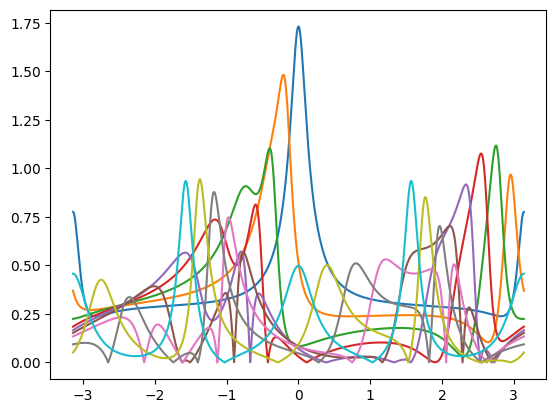

In [69]:
xs = np.linspace(-np.pi,np.pi,10000)

B = np.linspace(0,np.pi,10)
for b in B:
    # plt.plot(xs,dist_ab(xs,np.sqrt(0.6)*np.exp((b)*1j),np.sqrt(0.6)*np.exp((np.pi+b)*1j),0))
    plt.plot(xs,abs(dist(xs,np.sqrt(0.6)*np.exp((b)*1j),0.6*np.exp((2*b)*1j))))